In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

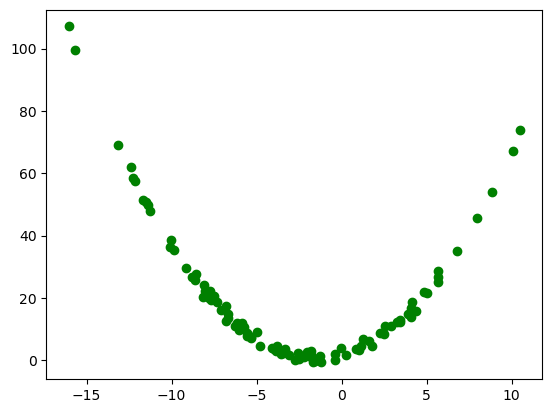

In [ ]:
X = 6*np.random.randn(100,1)-3
y= 0.5*X**2+1.5*X+2+np.random.randn(100,1)


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [9]:
regression.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score

score = r2_score(y_test,regression.predict(X_test))
print(score)

-0.07786923704198401


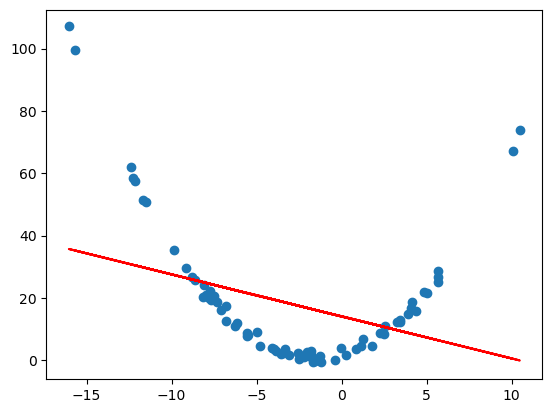

In [13]:
import seaborn

plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)

In [16]:
regression.fit(X_train_poly,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score

score = r2_score(y_test,regression.predict(X_test_poly))
print(score)

0.9966214698849433


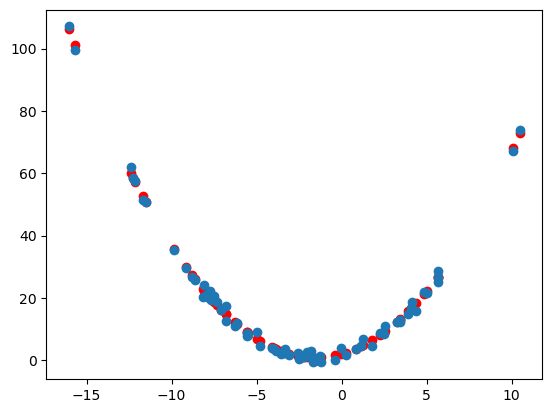

In [23]:
import seaborn

plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)

In [43]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

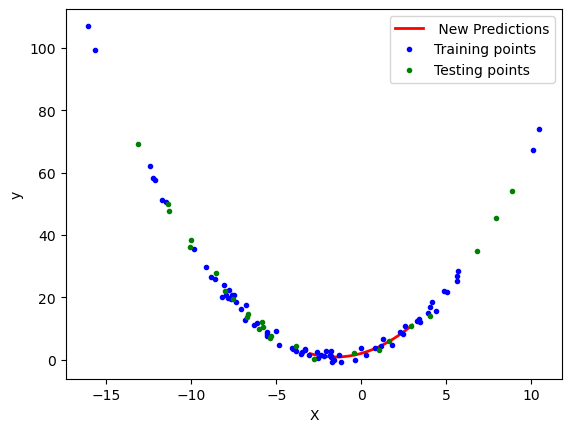

In [44]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=True)
lin_reg=LinearRegression()

poly_regression= Pipeline([('poly',poly_features),('regression',lin_reg)])